In [197]:
import numpy as np
import pandas as pd

from pandas import read_csv

from matplotlib import pyplot as plt

import seaborn as sns

from IPython.display import Image
from IPython.core.display import HTML
from sklearn import datasets


import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn import decomposition
from sklearn.decomposition import pca
from sklearn.preprocessing import StandardScaler


import scipy

from scipy.stats.stats import spearmanr
from scipy.stats import chi2_contingency
import seaborn as sns
%matplotlib inline

In [198]:
tips = sns.load_dataset("tips")

labelencoder = LabelEncoder()
tips['sex'] = labelencoder.fit_transform(tips['sex'])

In [199]:
df= tips[['total_bill','tip','size','sex']]
df.head()

,total_bill,tip,size,sex
0,16.99,1.01,2,0
1,10.34,1.66,3,1
2,21.01,3.50,3,1
3,23.68,3.31,2,1
4,24.59,3.61,4,0


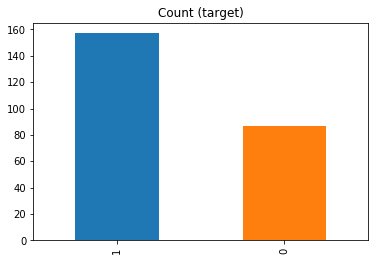

In [200]:
target_count = df['sex'].value_counts()
target_count.plot(kind='bar', title='Count (target)');

In [201]:
'Target class'
y = df.iloc[:,-1].values
X = df.iloc[:,:3].values


In [202]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X, y = smote.fit_sample(X, y)

#plt.plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

In [203]:

# Standardizing the features
X = StandardScaler().fit_transform(X)


In [204]:
pca = decomposition.PCA(n_components=2)
X = pca.fit_transform(X)
pca.explained_variance_ratio_

array([ 0.74745847,  0.16348984])

In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)


In [208]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [209]:
y_pred = model.predict(X_test)

In [210]:
'Accuracy'
score = model.score(X_test, y_test)
score

0.66666666666666663

In [211]:
'Accuracy'
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 66.67%


In [212]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[22,  7],
       [14, 20]])

In [213]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.61      0.76      0.68        29
          1       0.74      0.59      0.66        34

avg / total       0.68      0.67      0.67        63

